In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
data = pd.read_csv("data/data_ml.csv", header=0, index_col=0)
data["date"] = pd.to_datetime(data["date"])
data.sort_values(["date","stock_id"], inplace=True)
data.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
1,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
2,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
3,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
4,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
5,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113


For each stock and each date (monthly) there are 93 features. 

<Axes: xlabel='date'>

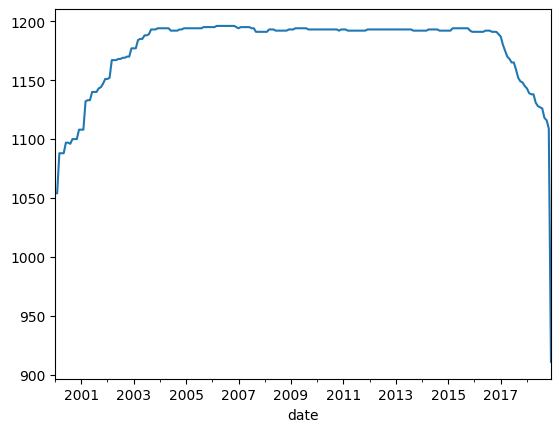

In [52]:
# the number of stocks changes with time
data.groupby(['date']).size().plot()

In [53]:
# Obviously the number of date drops at two ends so we only keep the date with sufficient data points
data = data[(data["date"]<"2019-01-01") & (data["date"]>"1999-12-31")]

In [57]:
# The last four columns are labels which corresponds to 1,3,6,12 month future returns 
data.iloc[:,95:].describe()

,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
count,268336.000000,268336.000000,268336.000000,268336.000000
mean,0.012732,0.036901,0.072339,0.136865
std,0.176431,0.328289,0.527420,0.737872
min,-0.922000,-0.929000,-0.980000,-0.991000
25%,-0.042000,-0.063000,-0.079000,-0.090000
50%,0.011000,0.030000,0.050000,0.080000
75%,0.064000,0.123000,0.186000,0.285000
max,30.176000,39.389000,106.929000,95.972000


In [ ]:
def load_data():
    data = pd.read_csv("data/data_ml.csv", header=0, index_col=0)
    data["date"] = pd.to_datetime(data["date"])
    data = data[(data["date"]<"2019-01-01") & (data["date"]>"1999-12-31")]
    data.sort_values(["date","stock_id"], inplace=True)
    return data